In [1]:
#  This version is a try for three feature

In [2]:
import numpy as np

#Defining the DataSet
from qiskit_aer import AerSimulator
from sklearn import datasets
from sklearn.model_selection import train_test_split

from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler


SEED = 1234
qasm_sim = AerSimulator()



In [3]:
IBMProvider.save_account(token="eb6ca034903ca8ac38fb9da2179c3de47dfa826dfc7b49984ac1653d047c56d2f93d116e9fc939138b41025cb45af3867f9b02b9b51fd0d219c0ab9119fcf95f",overwrite=True)

In [4]:
provider = IBMProvider()
print(provider.instances())

['pinq-quebec-hub/ecole-dhiver/qml-workshop', 'ibm-q/open/main']


In [5]:
provider = IBMProvider(instance='pinq-quebec-hub/ecole-dhiver/qml-workshop')

In [6]:
provider.backends()

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_quebec')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

In [7]:
ibm_simulator = provider.get_backend("ibmq_qasm_simulator")
quebec = provider.get_backend("ibm_quebec")

In [8]:
service = QiskitRuntimeService()

In [200]:
n_samples=50
a = 2
b = -2
c=4

x1, _ = datasets.make_gaussian_quantiles(mean = [2*a,2*a,1*c], cov=2.0, n_samples=n_samples, n_features=3, n_classes=2, random_state=SEED)
x2, _ = datasets.make_gaussian_quantiles(mean = [1*a,1*b,1*c], cov=3.0, n_samples=n_samples, n_features=3, n_classes=2, random_state=SEED)
x3, _ = datasets.make_gaussian_quantiles(mean = [1*b,1*a, 1*c], cov=5.0, n_samples=n_samples, n_features=3, n_classes=2, random_state=SEED)
x4, _ = datasets.make_gaussian_quantiles(mean = [4*b,4*b,1*c], cov=6.0, n_samples=n_samples, n_features=3, n_classes=2, random_state=SEED)

y1 = np.array([0 for i in range(n_samples)])
y2 = np.array([1 for i in range(n_samples)])
y3 = np.array([2 for i in range(n_samples)])
y4 = np.array([3 for i in range(n_samples)])

x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))


# Normalizatin
dist_x = (np.max(x[:,0]) - np.min(x[:,0]))
dist_y = (np.max(x[:,1]) - np.min(x[:,1]))
dist_z = (np.max(x[:,2]) - np.min(x[:,2]))

x[:,0] = x[:,0] / dist_x
x[:,1] = x[:,1] / dist_y
x[:,2] = x[:,2] / dist_z

num_classes = 4
num_features = 3
dimension = 3
x_blue = x[y==0]
x_red = x[y==1]

test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=SEED, stratify=y)

In [201]:
x_train

array([[ 1.80904040e-01, -1.69461491e-01,  2.73183797e-01],
       [ 1.68025350e-01,  5.38539750e-02,  3.72633914e-01],
       [-5.16562811e-01, -3.98504927e-01,  4.25460094e-01],
       [-7.96007515e-02, -1.33419142e-01,  3.90077373e-01],
       [ 5.93250917e-02,  1.89078255e-01,  4.70894806e-01],
       [ 6.04920527e-02, -1.64163839e-01,  4.74235562e-01],
       [-2.25547760e-01, -2.97403361e-01,  3.17001916e-01],
       [-2.44480138e-01, -4.83134704e-01,  3.45911173e-01],
       [ 3.95767121e-02, -7.37394204e-02,  3.03805224e-01],
       [ 1.47566355e-01,  1.50661023e-01,  4.50083275e-01],
       [ 2.27256382e-01,  2.63901757e-01,  3.27828513e-01],
       [-1.73307208e-01,  9.31331301e-02,  4.01602962e-01],
       [-1.01866233e-01,  8.04946745e-02,  4.72983448e-01],
       [ 1.53655924e-01, -1.11739282e-01,  6.93598414e-01],
       [ 2.83678262e-01,  2.18388722e-01,  2.02992026e-01],
       [ 6.55609667e-02,  1.69947086e-01,  4.33366925e-01],
       [-1.11949264e-01,  1.96462409e-02

In [202]:
# Plot of the dataset

import matplotlib.pyplot as plt
import numpy as np



def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        # z coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 2],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(x_train, y_train,x_test, y_test):

# train_features, train_labels, test_features, test_labels
    plt.figure(figsize=(5, 5))
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    # A train plot
    plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_train,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_train,  y_train, 3, "p", "w", "y", "D train")

    # A test plot
    plot_features(plt, x_test, y_test, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, x_test, y_test, 1, "o", "r", "w", "B test")

    # C test plot
    plot_features(plt, x_test,  y_test, 2, "v", "g", "w", "C test")

    # D test plot
    plot_features(plt, x_test,  y_test, 3, "p", "y", "w", "D test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Dataset")

    plt.show()


def plot_dataset_train(x_train, y_train):

# train_features, train_labels, test_features, test_labels
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # plt.ylim(-1, 1)
    # plt.xlim(-1, 1)
    # ax.set_zlim(-1,1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    # A train plot
    plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_train,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_train,  y_train, 3, "p", "w", "y", "D train")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()


def plot_dataset_center(x_train, y_train, xc,yc, dist_x, dist_y):

# train_features, train_labels, test_features, test_labels
    plt.figure(figsize=(5, 5))
    # plt.ylim(-1, 1)
    # plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    x_temp = x_train.copy()
    x_temp[:,0] = dist_x*x_train[:,0]
    x_temp[:,1] = dist_y*x_train[:,1]
    x_temp[:,2] = dist_z*x_train[:,2]
    # A train plot
    plot_features(plt, x_temp,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_temp,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_temp,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_temp,  y_train, 3, "p", "w", "y", "D train")

    plt.scatter(
        xc,
        yc,
        marker="o",
        facecolors="k",
        edgecolors="k",
        label="Centers",
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Dataset with estimated center")

    plt.show()


def plot_dataset_center_3d(x_train, y_train, xc,yc, zc, dist_x, dist_y, dist_z, name):

# train_features, train_labels, test_features, test_labels
    # plt.figure(figsize=(5, 5))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # plt.ylim(-1, 1)
    # plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    x_temp = x_train.copy()
    x_temp[:,0] = dist_x*x_train[:,0]
    x_temp[:,1] = dist_y*x_train[:,1]
    x_temp[:,2] = dist_z*x_train[:,2]
    # A train plot
    plot_features(plt, x_temp,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_temp,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_temp,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_temp,  y_train, 3, "p", "w", "y", "D train")

    plt.scatter(
        xc,
        yc,
        zc,
        marker="o",
        facecolors="k",
        edgecolors="k",
        label="Centers",
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Dataset with estimated center")

    # plt.savefig(name)
    
    plt.show()

/home/jonathan/.venv/qml-winterschool/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


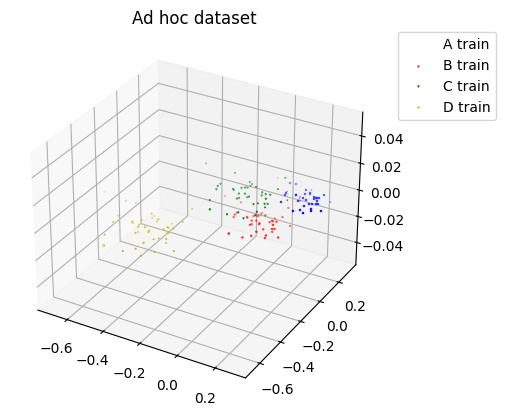

In [203]:
plot_dataset_train(x_train, y_train)


In [246]:
# Define the Kernel as K(x,y) = |<ψ(x)|ψ(y)>|^2  ie fidelity estimation
#since the K(x,y) is dependant on the feature map, we define it here too

from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
# from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

#definition of the quantum feature map
# We can change this feature map for testing multiple feature map
# feature_map = ZZFeatureMap(feature_dimension=dimension, reps=1, entanglement="linear")
feature_map = ZFeatureMap(feature_dimension=dimension, reps=3)


In [247]:

# #Here, we could define the Sampler for estimation of the fidelity/overlap K(x,y)
# sampler = Sampler()
# fidelity = ComputeUncompute(sampler, options=None, local=False)


# # Wraps the feature map, the sampler and the fidelity estimator in kernel
# kernel = FidelityQuantumKernel(feature_map=feature_map)


In [248]:
with Session(service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session)
 
    # job = sampler.run(bell, shots=1024)

    fidelity = ComputeUncompute(sampler)


    # Wraps the feature map, the sampler and the fidelity estimator in kernel
    kernel = FidelityQuantumKernel(feature_map=feature_map)
    matrix = kernel.evaluate(x_vec=x_train)
    
    # print(f"Job ID: {job.job_id()}")
    # print(f"Job result: {job.result()}")
 
    # You can run more jobs inside the session

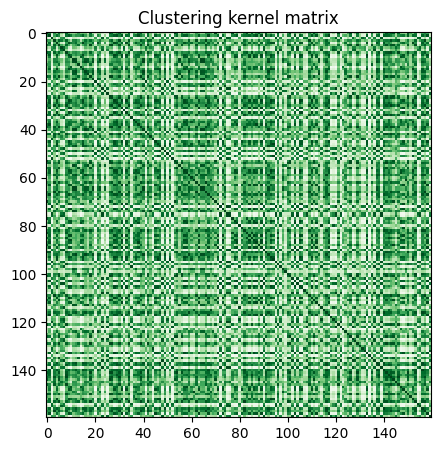

In [249]:
# matrix = kernel.evaluate(x_vec=x_train)
# matrix_test = kernel.evaluate(x_vec=x_train, y_vec = y_test)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Clustering kernel matrix")
plt.show()

In [250]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

spectral = SpectralClustering(num_classes, affinity="precomputed")

cluster_labels = spectral.fit_predict(matrix)

cluster_score = normalized_mutual_info_score(cluster_labels, y_train)

print(f"Clustering score: {cluster_score}")

Clustering score: 0.7776715129774078


/home/jonathan/.venv/qml-winterschool/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


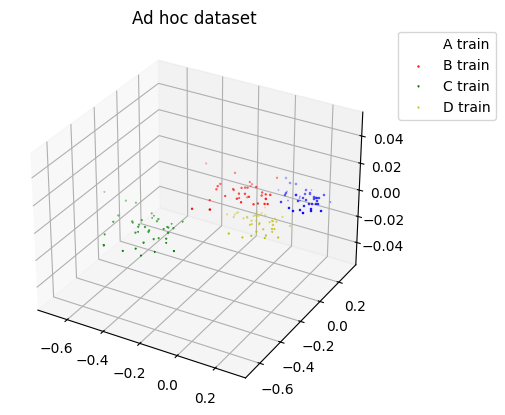

In [251]:
# plot_dataset(x_train, cluster_labels,x_test, y_test)
plot_dataset_train(x_train, cluster_labels)


In [252]:
# Use PCA to see the separation of the projection

from sklearn.decomposition import KernelPCA

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix)
# test_features_q = kernel_pca_q.transform(matrix_test)

In [253]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, y_train)

# logistic_score = logistic_regression.score(test_features_q, y_test)
# print(f"Logistic regression score: {logistic_score}")

LogisticRegression()

In [254]:
# fig, (q_ax) = plt.subplots(1, 1, figsize=(10, 5))


# plot_features(q_ax, train_features_q, y_train, 0, "s", "w", "b", "A train")
# plot_features(q_ax, train_features_q, y_train, 1, "o", "w", "r", "B train")
# plot_features(q_ax, train_features_q, y_train, 2, "v", "w", "g", "C train")
# plot_features(q_ax, train_features_q, y_train, 3, "p", "y", "w", "B train")

# # plot_features(q_ax, test_features_q, test_labels, 0, "s", "b", "w", "A test")
# # plot_features(q_ax, test_features_q, test_labels, 1, "o", "r", "w", "A test")

# q_ax.set_ylabel("Principal component #1")
# q_ax.set_xlabel("Principal component #0")
# q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

# # Plotting the linear separation
# h = 0.01  # step size in the mesh

# # create a mesh to plot in
# x_min, x_max = train_features_q[:, 0].min() - 1, train_features_q[:, 0].max() + 1
# y_min, y_max = train_features_q[:, 1].min() - 1, train_features_q[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# predictions = predictions.reshape(xx.shape)
# q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

# plt.show()

In [255]:
x0 = dist_x*sum(x_train[cluster_labels==0][:,0])/len(x_train[cluster_labels==0][:,0])
y0 = dist_y*sum(x_train[cluster_labels==0][:,1])/len(x_train[cluster_labels==0][:,1])
z0 = dist_z*sum(x_train[cluster_labels==0][:,2])/len(x_train[cluster_labels==0][:,2])

x1 = dist_x*sum(x_train[cluster_labels==1][:,0])/len(x_train[cluster_labels==1][:,0])
y1 = dist_y*sum(x_train[cluster_labels==1][:,1])/len(x_train[cluster_labels==1][:,1])
z1 = dist_z*sum(x_train[cluster_labels==1][:,2])/len(x_train[cluster_labels==1][:,2])

x2 = dist_x*sum(x_train[cluster_labels==2][:,0])/len(x_train[cluster_labels==2][:,0])
y2 = dist_y*sum(x_train[cluster_labels==2][:,1])/len(x_train[cluster_labels==2][:,1])
z2 = dist_z*sum(x_train[cluster_labels==2][:,2])/len(x_train[cluster_labels==2][:,2])

x3 = dist_x*sum(x_train[cluster_labels==3][:,0])/len(x_train[cluster_labels==3][:,0])
y3 = dist_y*sum(x_train[cluster_labels==3][:,1])/len(x_train[cluster_labels==3][:,1])
z3 = dist_z*sum(x_train[cluster_labels==3][:,2])/len(x_train[cluster_labels==3][:,2])

xc = np.array([x0,x1,x2,x3])
yc = np.array([y0,y1,y2,y3])
zc = np.array([z0,z1,z2,z3])

In [256]:
print(x0,y0)
print(x1,y1)
print(x2,y2)
print(x3,y3)

3.886510945739751 3.5970430997460583
-2.8455375664602274 1.6860188380639465
-8.233215006179403 -8.646789313503144
1.969322750271307 -2.375856287707366


In [257]:
print(2*a,2*a)
print(a,b)
print(b,a)
print(4*b,4*b)

4 4
2 -2
-2 2
-8 -8


/home/jonathan/.venv/qml-winterschool/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


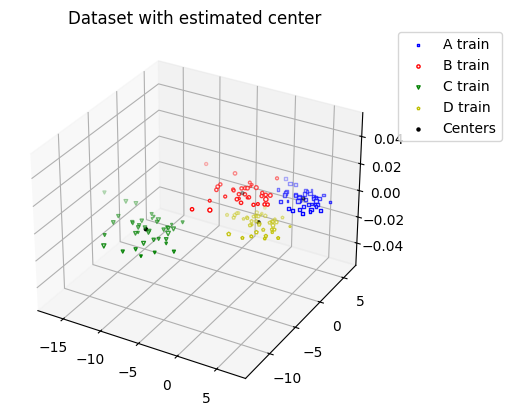

In [258]:
plot_dataset_center_3d(x_train,cluster_labels, xc,yc,zc, dist_x, dist_y, dist_z, "kernelC_4B_3f_ibmS")